In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.gct", index_col=[0], sep='\t')
df.drop(labels='Description', axis=1,inplace=True)
df.index=[g[:15] for g in df.index]
df.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
ENSG00000223972,3,4,1,1,0,2,1,3,5,1,...,5,9,4,0,27,24,5,22,11,6
ENSG00000227232,616,395,826,364,301,419,340,451,424,331,...,226,839,220,252,358,281,530,686,389,548
ENSG00000243485,2,1,1,0,1,0,2,3,1,1,...,2,1,0,2,0,1,1,0,1,1
ENSG00000237613,1,0,1,1,0,0,2,3,2,0,...,0,3,2,1,0,2,0,2,1,1
ENSG00000268020,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,2,0,0,1


In [3]:
#df.to_csv("mainTable.csv", header=True, index=True)

## GTEx Biospecimen
[GTEX_biospecimen](https://gtexportal.org/home/samplesPage)

In [4]:
df_file = pd.read_csv("https://storage.googleapis.com/gtex_analysis_v7/annotations/GTEx_v7_Annotations_SampleAttributesDS.txt", sep='\t', index_col=[0])
df_file=df_file.loc[:,['SMTS', 'SMTSD']]
df_file.head()

,SMTS,SMTSD
SAMPID,,
GTEX-1117F-0003-SM-58Q7G,Blood,Whole Blood
GTEX-1117F-0003-SM-5DWSB,Blood,Whole Blood
GTEX-1117F-0003-SM-6WBT7,Blood,Whole Blood
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,Adipose - Subcutaneous
GTEX-1117F-0426-SM-5EGHI,Muscle,Muscle - Skeletal


In [5]:
df_sites=pd.DataFrame()
df_sites.insert(0,'sample',df_file.index.values)
df_sites.insert(1,'primary_site',df_file.loc[:,'SMTS'].values)
df_sites.insert(2,'secondary_site', df_file.loc[:,'SMTSD'].values)
df_sites.set_index('sample', inplace=True)
df_sites.head()

,primary_site,secondary_site
sample,,
GTEX-1117F-0003-SM-58Q7G,Blood,Whole Blood
GTEX-1117F-0003-SM-5DWSB,Blood,Whole Blood
GTEX-1117F-0003-SM-6WBT7,Blood,Whole Blood
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,Adipose - Subcutaneous
GTEX-1117F-0426-SM-5EGHI,Muscle,Muscle - Skeletal


In [6]:
np.unique(df_sites['primary_site'])

array(['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood',
       'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast', 'Cervix Uteri',
       'Colon', 'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver',
       'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary',
       'Prostate', 'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen',
       'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina'], dtype=object)

In [7]:
df_sites.loc[df.columns,:].to_csv("files.dat", header=True, index=True)

In [8]:
pc=pd.read_csv("../genes.txt", index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene
ENSG00000167578,18722.0,protein-coding
ENSG00000078237,46830.0,protein-coding
ENSG00000146083,11328.0,protein-coding
ENSG00000158486,226330.0,protein-coding
ENSG00000198242,4966.0,protein-coding


In [9]:
df.loc[pc.index.values,df_sites[df_sites['primary_site'].isin(['Blood', 'Brain', 'Lung', 'Thyroid', 'Hearth', 'Breast', 'Skin', 'Pancreas', 'Testis', 'Adipose Tissue'])].index.values].fillna(0).astype(int).to_csv("mainTable_topic.csv",index=True, header=True)

/Users/filippo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# U

In [54]:
tissue = 'Breast'

In [55]:
sample_list = df_sites[df_sites['primary_site']==tissue].index.values
subdf = df.loc[:,sample_list]

In [56]:
O = []
O_nc = []
for g in subdf.index.values:
    o = len([read for read in subdf.loc[g].values if read > 1e-1])
    if o>1:
        if g in pc.index.values:
            O.append(o)
        else:
            O_nc.append(o)

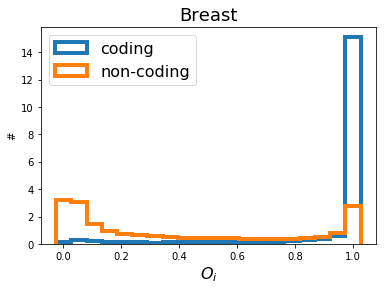

In [57]:
bins = 20
rang = (0-0.5/20,1+0.5/20)
fig = plt.figure()
plt.hist(np.array(O,dtype=float)/np.max(O), histtype='step', lw=4, density=True, bins=bins, range=rang, label='coding')
plt.hist(np.array(O_nc,dtype=float)/np.max(O_nc), histtype='step', lw=4, density=True, bins=bins, range=rang, label='non-coding')
plt.title(tissue, fontsize=18)
plt.xlabel('$O_i$', fontsize=16)
plt.ylabel('#')
plt.legend(loc='upper left', fontsize=16)
plt.show()
fig.savefig("U_%s.png"%tissue)